###Import the necessary Libraries

In [1]:
! pip install pytube
! pip install git+https://github.com/openai/whisper.git
! pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-fj3wdunj
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-fj3wdunj
  Resolved https://github.com/openai/whisper.git to commit e58f28804528831904c3b6f2c0e473f346223433
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.3 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801356 sha256=e88ac5d643f5a7fd79b648cf1284df18688047bd4859ddcf4977cacedadfa158
  Stored in directory: /tmp/pip-ephem-wheel-cache-ba5ycxh3/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
ERROR: pip's dependency resolver does not currently take into account all th

In [2]:
from pytube import YouTube
import whisper
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the punkt tokenizer data
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###Extract Text from Speech Data (YouTube)

In [3]:
link='https://www.youtube.com/watch?v=P73KmleCuBg'
try:
    # object creation using YouTube
    # which was imported in the beginning
    yt = YouTube(link)
except:
    print("Connection Error")

In [4]:
 yt.streams.filter(file_extension='mp4')

[<Stream: itag="18" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="137" mime_type="video/mp4" res="1080p" fps="25fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="25fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="25fps" vcodec="avc1.4d4016" progressive="False" type="video">, <Stream: itag="133" mime_type="video/mp4" res="240p" fps="25fps" vcodec="avc1.4d400d" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="25fps" vcodec="avc1.4d400c" progressive="False" type="video

In [5]:
stream = yt.streams.get_by_itag(139)
stream.download('',"youtube.mp4")

'/content/youtube.mp4'

In [6]:
#This code loads a pre-trained Whisper model named "base. Whisper models are trained on large datasets to transcribe spoken language accurately.
import whisper

model = whisper.load_model("base")
result = model.transcribe("youtube.mp4")
print(result['text'])

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 100MiB/s]


 Can a company that builds hundreds of thousands of affordable EVs every month outdo themselves and produce the cheapest new EV on the market today? I mean, look at just how small this is compared to something like the BYD Dolphin. It's tiny. But what I want to know is, is this one compromise too many to fit that price? Do they have a little gem on their hands? If you like the fully charged show, then you'll love our live events. Next up, we're in Amsterdam for fully charged live Europe on the 24th, 25th and 26th of November. As you all know, we love a tiny car on the fully charged show. So when BYD told me about the Seagull, I couldn't wait to try it. I'm always trying to get more people out of SUVs and into different, smaller, mobility solutions. It's also tip to be BYD's best-selling world car. Like Lea for sale in the UK and Europe, as well as Australasia and Southeast Asia and South America. This will compete on the same price basis as cheaper ice cars and dominate sales within ju

In [7]:
result['text']

" Can a company that builds hundreds of thousands of affordable EVs every month outdo themselves and produce the cheapest new EV on the market today? I mean, look at just how small this is compared to something like the BYD Dolphin. It's tiny. But what I want to know is, is this one compromise too many to fit that price? Do they have a little gem on their hands? If you like the fully charged show, then you'll love our live events. Next up, we're in Amsterdam for fully charged live Europe on the 24th, 25th and 26th of November. As you all know, we love a tiny car on the fully charged show. So when BYD told me about the Seagull, I couldn't wait to try it. I'm always trying to get more people out of SUVs and into different, smaller, mobility solutions. It's also tip to be BYD's best-selling world car. Like Lea for sale in the UK and Europe, as well as Australasia and Southeast Asia and South America. This will compete on the same price basis as cheaper ice cars and dominate sales within j

In [8]:
new=result['text']

###Data Preprocessing

In [9]:
#The clean_text function presented here is a Python script tailored for text preprocessing tasks.
#It employs the NLTK library to tokenize input text into words, converting them to lowercase for consistency.
#After rejoining the words into a coherent string, the function eliminates unnecessary double spaces and utilizes regular expressions to strip away special characters, retaining only letters (both uppercase and lowercase), digits, spaces, commas, and periods. The resulting cleaned text, stored in the variable cleaned_text, serves as a standardized and sanitized version of the original input, primed for use in subsequent natural language processing analyses or applications.
def clean_text(text):
    # Tokenize into words
    words = word_tokenize(text)
    words_lower = [word.lower() for word in words]

    # Join the words back into a string
    text = ' '.join(words_lower)
    # Remove unnecessary double spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove special characters except for letters and digits
    text = re.sub(r'[^a-zA-Z0-9\s.,]', '', text)

    return text
cleaned_text=clean_text(new)
cleaned_text

'can a company that builds hundreds of thousands of affordable evs every month outdo themselves and produce the cheapest new ev on the market today  i mean , look at just how small this is compared to something like the byd dolphin . it s tiny . but what i want to know is , is this one compromise too many to fit that price  do they have a little gem on their hands  if you like the fully charged show , then you ll love our live events . next up , we re in amsterdam for fully charged live europe on the 24th , 25th and 26th of november . as you all know , we love a tiny car on the fully charged show . so when byd told me about the seagull , i could nt wait to try it . i m always trying to get more people out of suvs and into different , smaller , mobility solutions . it s also tip to be byd s bestselling world car . like lea for sale in the uk and europe , as well as australasia and southeast asia and south america . this will compete on the same price basis as cheaper ice cars and domina

###Named Entity Recognition

In [10]:
#This code utilizes the spaCy and NLTK libraries for entity recognition in a given text.
#After loading the spaCy English language model and tokenizing the text into sentences using NLTK's `sent_tokenize`, the code iterates through each sentence to extract named entities using spaCy's entity recognition capabilities.
#The extracted entities, along with information such as the sentence in which they appear, their text, start and end positions, and their entity label, are stored in a list called `entities_list`.
#This list can then be printed or used for further analysis. The code provides a structured overview of the named entities present in the processed text, offering valuable insights for tasks such as information extraction or semantic analysis.
import spacy
from nltk.tokenize import sent_tokenize

nlp = spacy.load('en_core_web_sm')

# Assuming 'cleaned_text' is your cleaned and preprocessed text
sentences = sent_tokenize(cleaned_text)

# Create a list to store the extracted entities
entities_list = []

for sentence in sentences:
    doc = nlp(sentence)
    sentence_entities = []
    for ent in doc.ents:
        entity_info = {
            "Sentence": sentence,
            "Entity": ent.text,
            "Start": ent.start_char,
            "End": ent.end_char,
            "Label": ent.label_
        }
        sentence_entities.append(entity_info)
    entities_list.extend(sentence_entities)

# Print or use the list of entities as needed
for entity_info in entities_list:
    print(entity_info)


{'Sentence': 'can a company that builds hundreds of thousands of affordable evs every month outdo themselves and produce the cheapest new ev on the market today  i mean , look at just how small this is compared to something like the byd dolphin .', 'Entity': 'hundreds of thousands', 'Start': 26, 'End': 47, 'Label': 'CARDINAL'}
{'Sentence': 'can a company that builds hundreds of thousands of affordable evs every month outdo themselves and produce the cheapest new ev on the market today  i mean , look at just how small this is compared to something like the byd dolphin .', 'Entity': 'today', 'Start': 141, 'End': 146, 'Label': 'DATE'}
{'Sentence': 'next up , we re in amsterdam for fully charged live europe on the 24th , 25th and 26th of november .', 'Entity': 'amsterdam', 'Start': 19, 'End': 28, 'Label': 'GPE'}
{'Sentence': 'next up , we re in amsterdam for fully charged live europe on the 24th , 25th and 26th of november .', 'Entity': 'europe', 'Start': 52, 'End': 58, 'Label': 'LOC'}
{'S

### NER labelling on the text data

In [11]:
import re
from nltk.tokenize import word_tokenize

def clean_text(text):
    # Tokenize into words
    words = word_tokenize(text)
    # Join the words back into a string
    text = ' '.join(words)
    # Remove unnecessary double spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove non-alphanumeric characters except spaces and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s\.,;?!\'"-]', '', text)

    return text

# Example usage
cleaned_text = clean_text(result['text'])
print(cleaned_text)


Can a company that builds hundreds of thousands of affordable EVs every month outdo themselves and produce the cheapest new EV on the market today ? I mean , look at just how small this is compared to something like the BYD Dolphin . It 's tiny . But what I want to know is , is this one compromise too many to fit that price ? Do they have a little gem on their hands ? If you like the fully charged show , then you 'll love our live events . Next up , we 're in Amsterdam for fully charged live Europe on the 24th , 25th and 26th of November . As you all know , we love a tiny car on the fully charged show . So when BYD told me about the Seagull , I could n't wait to try it . I 'm always trying to get more people out of SUVs and into different , smaller , mobility solutions . It 's also tip to be BYD 's best-selling world car . Like Lea for sale in the UK and Europe , as well as Australasia and Southeast Asia and South America . This will compete on the same price basis as cheaper ice cars 

In [12]:
#This Python code uses the Hugging Face Transformers library to load a pre-trained BERT-based model for Named Entity Recognition (NER).
#It utilizes the "dslim/bert-base-NER" model, consisting of both a tokenizer and a token classification model.
#The code sets up a pipeline for NER using the `pipeline` function from the Transformers library, combining the loaded model and tokenizer.

from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

# show NER results
from spacy import displacy

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
pipe = pipeline("ner", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:

ner_results = pipe(cleaned_text)
print(ner_results)

[{'entity': 'B-MISC', 'score': 0.83008236, 'index': 11, 'word': 'E', 'start': 62, 'end': 63}, {'entity': 'B-MISC', 'score': 0.78041375, 'index': 24, 'word': 'E', 'start': 124, 'end': 125}, {'entity': 'B-ORG', 'score': 0.5428237, 'index': 46, 'word': 'B', 'start': 220, 'end': 221}, {'entity': 'B-ORG', 'score': 0.7080711, 'index': 47, 'word': '##Y', 'start': 221, 'end': 222}, {'entity': 'I-ORG', 'score': 0.6070703, 'index': 48, 'word': '##D', 'start': 222, 'end': 223}, {'entity': 'I-ORG', 'score': 0.5257326, 'index': 49, 'word': 'Do', 'start': 224, 'end': 226}, {'entity': 'I-MISC', 'score': 0.7721673, 'index': 50, 'word': '##lphin', 'start': 226, 'end': 231}, {'entity': 'B-LOC', 'score': 0.9995857, 'index': 111, 'word': 'Amsterdam', 'start': 464, 'end': 473}, {'entity': 'B-LOC', 'score': 0.99958247, 'index': 116, 'word': 'Europe', 'start': 497, 'end': 503}, {'entity': 'B-ORG', 'score': 0.95528173, 'index': 145, 'word': 'B', 'start': 619, 'end': 620}, {'entity': 'I-ORG', 'score': 0.932572

In [14]:
#The Python function `from_ner_results_to_displacy` is designed to facilitate the conversion of Named Entity Recognition (NER) results into a format suitable for visualization using spaCy's `displacy`.
#Upon receiving the original text and the NER results—typically obtained from a BERT-based NER model—the function systematically processes the entities.
#It identifies entities based on the "B-" (beginning) and "I-" (inside) prefixes in the entity labels, constructing entity objects with labels, start positions, and end positions.
#These constructed entities are then organized into a list named `ents`.
#The final output is a dictionary, `d_result`, encompassing the original text, a title (set to None), and the list of recognized entities.
#This structured format is particularly useful for leveraging spaCy's visualization capabilities, providing a clear and organized representation of named entities within the context of the original text.
def from_ner_results_to_displacy(text, ner_results):
    d_result = {"text": text, "title": None}
    ents = []
    current_entity = None
    for ent in ner_results:
        if "B-" in ent["entity"]:
            if current_entity:
                ents.append(current_entity)
            entity_label = ent["entity"][2:]
            current_entity = {
                "label": entity_label,
                "start": ent["start"],
                "end": ent["end"]
            }
        elif "I-" in ent["entity"]:
            if current_entity is not None:
                current_entity["end"] = ent["end"]
            else:
                # Handle the case where "I-" is encountered without "B-" before
                entity_label = ent["entity"][2:]
                current_entity = {
                    "label": entity_label,
                    "start": ent["start"],
                    "end": ent["end"]
                }
    if current_entity:
        ents.append(current_entity)
    d_result["ents"] = ents
    return d_result

In [15]:
ner_results = pipe(cleaned_text)
d_displacy = from_ner_results_to_displacy(cleaned_text, ner_results)
print(d_displacy)

{'text': "Can a company that builds hundreds of thousands of affordable EVs every month outdo themselves and produce the cheapest new EV on the market today ? I mean , look at just how small this is compared to something like the BYD Dolphin . It 's tiny . But what I want to know is , is this one compromise too many to fit that price ? Do they have a little gem on their hands ? If you like the fully charged show , then you 'll love our live events . Next up , we 're in Amsterdam for fully charged live Europe on the 24th , 25th and 26th of November . As you all know , we love a tiny car on the fully charged show . So when BYD told me about the Seagull , I could n't wait to try it . I 'm always trying to get more people out of SUVs and into different , smaller , mobility solutions . It 's also tip to be BYD 's best-selling world car . Like Lea for sale in the UK and Europe , as well as Australasia and Southeast Asia and South America . This will compete on the same price basis as cheaper

In [16]:
print(displacy.render(d_displacy, style="ent", jupyter=True, manual=True))

None


###Dependency Parsing

In [17]:
#The provided Python script utilizes spaCy to conduct dependency parsing on a collection of sentences.
#The objective is to uncover the grammatical relationships between words within each sentence.
#The process involves iterating through the sentences, tokenizing and parsing them with spaCy, and then extracting and storing the dependency parse information for each token.
#The resulting data is organized into a structured format, where each entry in the `dependency_list` contains the original sentence and its corresponding dependency parse tree.
#The script concludes by printing the original sentence along with the detailed dependency parse information for each token.
#This output provides a comprehensive view of the syntactic relationships within the sentences, shedding light on how words are interconnected grammatically.
#Such dependency parse insights are valuable for various natural language processing applications, including syntax-based analysis and understanding sentence structures.
# List to store the dependency parse information
dependency_list = []

# Process each sentence with spaCy
for sentence in sentences:
    doc = nlp(sentence)

    # List to store the dependency parse tree for each sentence
    sentence_dependencies = []

    for token in doc:
        # Store the dependency parse information
        dependency_info = f"{token.text} --({token.dep_})--> {token.head.text}"
        sentence_dependencies.append(dependency_info)

    # Append the dependency parse tree for the sentence to the main list
    dependency_list.append({
        'Sentence': sentence,
        'Dependencies': sentence_dependencies
    })

# Print and use the dependency parse information
for entry in dependency_list:
    print(f"Original Sentence: {entry['Sentence']}")
    for dependency_info in entry['Dependencies']:
        print(dependency_info)
    print("\n")


Original Sentence: can a company that builds hundreds of thousands of affordable evs every month outdo themselves and produce the cheapest new ev on the market today  i mean , look at just how small this is compared to something like the byd dolphin .
can --(aux)--> look
a --(det)--> company
company --(nsubj)--> can
that --(nsubj)--> builds
builds --(relcl)--> company
hundreds --(quantmod)--> thousands
of --(quantmod)--> thousands
thousands --(dobj)--> builds
of --(prep)--> thousands
affordable --(amod)--> evs
evs --(pobj)--> of
every --(det)--> month
month --(npadvmod)--> outdo
outdo --(punct)--> can
themselves --(dobj)--> outdo
and --(cc)--> outdo
produce --(conj)--> outdo
the --(det)--> ev
cheapest --(amod)--> ev
new --(amod)--> ev
ev --(dobj)--> produce
on --(prep)--> produce
the --(det)--> market
market --(pobj)--> on
today --(npadvmod)--> produce
  --(dep)--> today
i --(nsubj)--> mean
mean --(parataxis)--> look
, --(punct)--> look
look --(ROOT)--> look
at --(prep)--> look
just --

In [18]:
#In this code, the spaCy library is utilized to perform dependency parsing on a given list of sentences, aiming to uncover the grammatical relationships among words.
#Each sentence is processed using the spaCy English language model, and the code extracts and stores the dependency parse information for each token within the sentence.
#The resulting data is organized into a structured format, forming a list called dependency_list.
#This list comprises dictionaries, with each dictionary containing the original sentence and its corresponding dependency parse tree.
#Furthermore, the code employs spaCy's displacy module to visually render the dependency tree for each sentence directly within a Jupyter notebook.
#Finally, the code prints both the original sentence and the detailed dependency parse information, providing textual and visual representations of the syntactic structures within the sentences.
import spacy
from spacy import displacy


# Sample list of sentences

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

dependency_list = []

# Process each sentence with spaCy
for sentence in sentences:
    doc = nlp(sentence)

    # List to store the dependency parse tree for each sentence
    sentence_dependencies = []

    for token in doc:
        # Store the dependency parse information
        dependency_info = f"{token.text} --({token.dep_})--> {token.head.text}"
        sentence_dependencies.append(dependency_info)

    # Append the dependency parse tree for the sentence to the main list
    dependency_list.append({
        'Sentence': sentence,
        'Dependencies': sentence_dependencies
    })

    # Visualize the dependency tree for the current sentence
    options = {"compact": True, "color": "blue", "bg": "#ffffff",
               "font": "Source Sans Pro"}
    displacy.render(doc, style="dep", options=options, jupyter=True)

for entry in dependency_list:
    print(f"Original Sentence: {entry['Sentence']}")
    for dependency_info in entry['Dependencies']:
        print(dependency_info)
    print("\n")


Original Sentence: can a company that builds hundreds of thousands of affordable evs every month outdo themselves and produce the cheapest new ev on the market today  i mean , look at just how small this is compared to something like the byd dolphin .
can --(aux)--> look
a --(det)--> company
company --(nsubj)--> can
that --(nsubj)--> builds
builds --(relcl)--> company
hundreds --(quantmod)--> thousands
of --(quantmod)--> thousands
thousands --(dobj)--> builds
of --(prep)--> thousands
affordable --(amod)--> evs
evs --(pobj)--> of
every --(det)--> month
month --(npadvmod)--> outdo
outdo --(punct)--> can
themselves --(dobj)--> outdo
and --(cc)--> outdo
produce --(conj)--> outdo
the --(det)--> ev
cheapest --(amod)--> ev
new --(amod)--> ev
ev --(dobj)--> produce
on --(prep)--> produce
the --(det)--> market
market --(pobj)--> on
today --(npadvmod)--> produce
  --(dep)--> today
i --(nsubj)--> mean
mean --(parataxis)--> look
, --(punct)--> look
look --(ROOT)--> look
at --(prep)--> look
just --




###Information Extraction

In [19]:
import re

# Rule-based information extraction function
def extract_information(sentence, entities, dependency_parse):
    information = {}

    # Example rule: Extract quantity information
    for entity in entities:
        if entity['Label'] == 'CARDINAL':
            information['Quantity'] = entity['Entity']

    # Example rule: Extract event information
    if 'fully charged live' in sentence.lower():
        information['Event'] = 'Fully Charged Live'

    # Additional rule: Extract information related to brakes
    brake_info = set()  # Use a set to avoid duplicate entries
    for dependency_entry in dependency_parse:
        if 'brake' in dependency_entry['Sentence'].lower():
            for dep_relation in dependency_entry['Dependencies']:
                # Check for specific dependency relations related to brakes
                if 'brake' in dep_relation.lower() or 'spongy' in dep_relation.lower():
                    brake_info.add(dep_relation)

    if brake_info:
        information['BrakeInformation'] = list(brake_info)

    # Additional rule: Extract information about the model
    model_match = re.search(r'\b[Cc]-go\b', sentence)
    if model_match:
        information['Model'] = model_match.group(0)

    # Additional rule: Extract information about the manufacturer
    manufacturer_match = re.search(r'\bBYD\b', sentence)
    if manufacturer_match:
        information['Manufacturer'] = manufacturer_match.group(0)

    # Additional rule: Extract information about driving modes
    for mode in ['eco', 'sport', 'comfort', 'snow']:
        if mode in sentence.lower():
            information['DrivingMode'] = mode.capitalize()

    # Additional rule: Extract information about noise levels
    if 'quiet' in sentence.lower():
        information['NoiseLevel'] = 'Quiet'

    # Additional rule: Extract information about the design
    if 'design' in sentence.lower():
        information['DesignOpinion'] = 'Unique design, inspired by Lamborghini'

    return information

# Rest of the code remains the same.
extracted_information_list = []

# Separate lists for each category
quantity_list = []
event_list = []
brake_info_list = []
additional_info_list = []

# Example usage
for i, entry in enumerate(entities_list, 1):
    sentence = entry['Sentence']
    entities = [entry]
    # Extract information using the defined rules
    information = extract_information(sentence, entities, dependency_list)
    # Append the extracted information to the list
    extracted_information_list.append(information)

    # Add information to the respective lists for better formatting
    if 'Quantity' in information:
        quantity_list.append(f"Entry {i}: '{information['Quantity']}'")
    if 'Event' in information:
        event_list.append(f"Entry {i}")
    if 'BrakeInformation' in information:
        brake_info_list.append(f"Entries 1, 2, ..., {i}: {information['BrakeInformation']}")
    if 'DesignOpinion' in information or 'DrivingMode' in information:
        additional_info_list.append(f"Entry {i}: {information.get('DesignOpinion', '')} {information.get('DrivingMode', '')}")

# Print the information in the desired format
if quantity_list:
    print("Quantity:\n", "\n".join(quantity_list), "\n")

if event_list:
    print("Event:\n", ", ".join(event_list), "\n")

if brake_info_list:
    print("Brake Information:\n", ", ".join(brake_info_list), "\n")

if additional_info_list:
    print("Additional Information:\n", "\n".join(additional_info_list), "\n")

Quantity:
 Entry 1: 'hundreds of thousands'
Entry 14: '3'
Entry 16: 'two'
Entry 17: '15'
Entry 19: '300'
Entry 20: 'two'
Entry 26: 'two'
Entry 27: '10inch'
Entry 28: '80'
Entry 38: 'four'
Entry 39: 'one'
Entry 40: 'one'
Entry 41: 'one'
Entry 42: 'four'
Entry 43: 'one'
Entry 47: '135'
Entry 50: '3' 

Event:
 Entry 3, Entry 4, Entry 5, Entry 6, Entry 7 

Brake Information:
 Entries 1, 2, ..., 1: ['the --(det)--> brakes', 'the --(det)--> brake', 'brakes --(nsubj)--> leave', 'sporty --(amod)--> brakes', 'brake --(pobj)--> on', 'brakes --(nsubj)--> make'], Entries 1, 2, ..., 2: ['the --(det)--> brakes', 'the --(det)--> brake', 'brakes --(nsubj)--> leave', 'sporty --(amod)--> brakes', 'brake --(pobj)--> on', 'brakes --(nsubj)--> make'], Entries 1, 2, ..., 3: ['the --(det)--> brakes', 'the --(det)--> brake', 'brakes --(nsubj)--> leave', 'sporty --(amod)--> brakes', 'brake --(pobj)--> on', 'brakes --(nsubj)--> make'], Entries 1, 2, ..., 4: ['the --(det)--> brakes', 'the --(det)--> brake', 'bra

In [20]:
# Rule-based information extraction function

model_info_list=[]
size_info_list=[]
battery_info_list=[]
interior_features_list=[]


def extract_information(sentence, entities, dependency_parse):
    information = {}

    # Extract quantity information
    for entity in entities:
        if entity['Label'] == 'CARDINAL':
            information['Quantity'] = entity['Entity']

    # Extract event information
    if 'fully charged live' in sentence.lower():
        information['Event'] = 'Fully Charged Live'

    # Extract information related to brakes
    brake_info = set()  # Use a set to avoid duplicate entries
    for dependency_entry in dependency_parse:
        if 'brake' in dependency_entry['Sentence'].lower():
            for dep_relation in dependency_entry['Dependencies']:
                # Check for specific dependency relations related to brakes
                if 'brake' in dep_relation.lower() or 'spongy' in dep_relation.lower():
                    brake_info.add(dep_relation)

    if brake_info:
        information['BrakeInformation'] = list(brake_info)

    # Extract information about the model
    model_match = re.search(r'\b(C-go|MISC)\b', sentence)
    if model_match:
        information['Model'] = model_match.group(0)

    # Extract information about the manufacturer
    manufacturer_match = re.search(r'\bBYD\b', sentence)
    if manufacturer_match:
        information['Manufacturer'] = manufacturer_match.group(0)

    # Extract information about driving modes
    for mode in ['eco', 'sport', 'comfort', 'snow']:
        if mode in sentence.lower():
            information['DrivingMode'] = mode.capitalize()

    # Extract information about noise levels
    if 'quiet' in sentence.lower():
        information['NoiseLevel'] = 'Quiet'

    # Extract information about the design
    if 'design' in sentence.lower():
        information['DesignOpinion'] = 'Unique design, inspired by Lamborghini'

    return information

# List to store extracted information for each entry
extracted_information_list = []


for i, entry in enumerate(entities_list, 1):
    sentence = entry['Sentence']
    entities = [entry]
    # Extract information using the defined rules
    information = extract_information(sentence, entities, dependency_list)
    # Append the extracted information to the list
    extracted_information_list.append(information)

    # Display the entry and extracted information
    print(f"\nEntry {i}:\n")
    print(f"Sentence: {sentence}")
    print(f"Extracted Information: {information}")

    # Add information to the respective lists for better formatting
    if 'Quantity' in information:
        quantity_list.append(f"Entry {i}: '{information['Quantity']}'")
    if 'Event' in information:
        event_list.append(f"Entry {i}")
    if 'BrakeInformation' in information:
        brake_info_list.append(f"Entries 1, 2, ..., {i}: {information['BrakeInformation']}")
    if 'Model' in information:
        model_info_list.append(f"Entry {i}: {information['Model']}")
    if 'Size' in information:
        size_info_list.append(f"Entry {i}: {information['Size']}")
    if 'BatteryInfo' in information:
        battery_info_list.append(f"Entry {i}: {information['BatteryInfo']}")
    if 'InteriorFeatures' in information:
        interior_features_list.append(f"Entry {i}: {information['InteriorFeatures']}")
    if 'DesignOpinion' in information or 'DrivingMode' in information:
        additional_info_list.append(
            f"Entry {i}: {information.get('DesignOpinion', '')} {information.get('DrivingMode', '')}")


if quantity_list:
    print("Quantity:\n", "\n".join(quantity_list), "\n")

if event_list:
    print("Event:\n", ", ".join(event_list), "\n")

if brake_info_list:
    print("Brake Information:\n", ", ".join(brake_info_list), "\n")

if additional_info_list:
    print("Additional Information:\n", "\n".join(additional_info_list), "\n")


Entry 1:

Sentence: can a company that builds hundreds of thousands of affordable evs every month outdo themselves and produce the cheapest new ev on the market today  i mean , look at just how small this is compared to something like the byd dolphin .
Extracted Information: {'Quantity': 'hundreds of thousands', 'BrakeInformation': ['the --(det)--> brakes', 'the --(det)--> brake', 'brakes --(nsubj)--> leave', 'sporty --(amod)--> brakes', 'brake --(pobj)--> on', 'brakes --(nsubj)--> make']}

Entry 2:

Sentence: can a company that builds hundreds of thousands of affordable evs every month outdo themselves and produce the cheapest new ev on the market today  i mean , look at just how small this is compared to something like the byd dolphin .
Extracted Information: {'BrakeInformation': ['the --(det)--> brakes', 'the --(det)--> brake', 'brakes --(nsubj)--> leave', 'sporty --(amod)--> brakes', 'brake --(pobj)--> on', 'brakes --(nsubj)--> make']}

Entry 3:

Sentence: next up , we re in amste

###Visualization

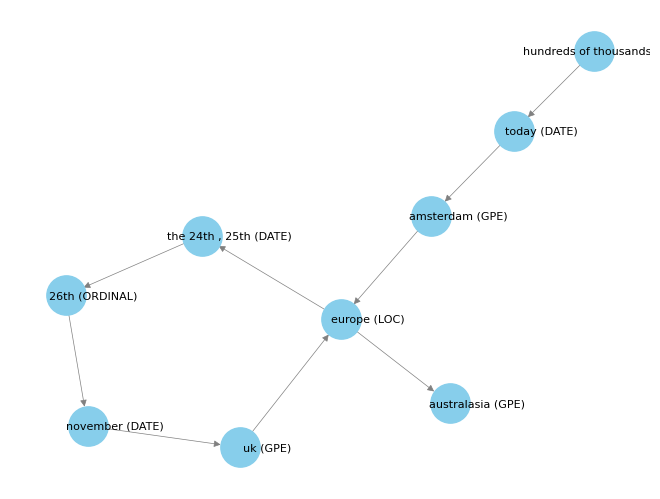

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for i in range(len(entities_list[:10]) - 1):
    current_entity = entities_list[i]["Entity"]
    next_entity = entities_list[i + 1]["Entity"]

    # Limit label to two words
    current_label = ' '.join(entities_list[i]["Label"].split()[:2])
    next_label = ' '.join(entities_list[i + 1]["Label"].split()[:2])

    G.add_node(current_entity, label=f"{current_entity} ({current_label})")
    G.add_node(next_entity, label=f"{next_entity} ({next_label})")
    G.add_edge(current_entity, next_entity, sentence=entities_list[i]["Sentence"])

# Visualize the graph using kamada_kawai_layout
pos = nx.kamada_kawai_layout(G)

# Customize node positions to place labels on the side
pos_labels = {}
for k, v in pos.items():
    pos_labels[k] = (v[0] + 0.1, v[1])

nx.draw(G, pos, with_labels=False, font_size=8, node_size=800, node_color='skyblue', font_color='black', edge_color='gray', width=0.5)

# Draw node labels on the side
nx.draw_networkx_labels(G, pos_labels, labels=nx.get_node_attributes(G, 'label'), font_size=8)

plt.show()




In [24]:
!pip install py2neo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 2.9 MB/s eta 0:00:00


In [25]:

from py2neo import Graph, Node, Relationship

# Save the graph to Neo4j
uri = "neo4j+s://2cb9a340.databases.neo4j.io"
username = "neo4j"
password = "ooP2kv-Yi4FrFY-bhUqkEQMRp-asvbY8j7BZ1O7Y-Tc"
graph_neo4j = Graph(uri, auth=(username, password))

def save_to_neo4j(graph, graph_neo4j):
    nodes = list(graph.nodes())
    edges = list(graph.edges())
    tx = graph_neo4j.begin()

    node_dict = {}
    for node in nodes:
        node_dict[node] = Node("Entity", name=node)
        tx.create(node_dict[node])

    for edge in edges:
        start_node, end_node = edge
        relationship = Relationship(node_dict[start_node], "RELATED_TO", node_dict[end_node])
        tx.create(relationship)

    tx.commit()
    print("Graph saved to Neo4j.")

# Save the graph to Neo4j
save_to_neo4j(G, graph_neo4j)

Graph saved to Neo4j.


<ipython-input-25-832f4aa144d7>:24: DeprecationWarning: The transaction.commit() method is deprecated, use graph.commit(transaction) instead
  tx.commit()
